In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import root

In [2]:
beta = 0.3
PD = 0.02374
RR = 0.4
AAA_PD = 0.003
A_PD = 0.008

In [3]:
def Portfolio_Loss(PD, beta, RR, maximum_theta = 1) :
    x = np.arange(0.001,maximum_theta,0.001)
    Loss_rate = 1-RR
    C = norm.ppf(PD)
    return pd.DataFrame(norm.cdf( - (C-norm.ppf( x / Loss_rate ) * np.sqrt(1-beta**2))/beta  ) , index = x, columns = ['P(Loss)'])

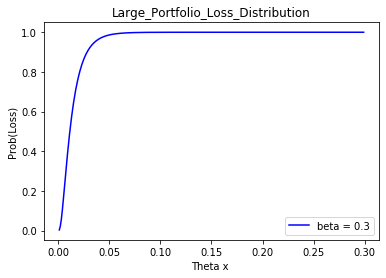

In [4]:
plt.title('Large_Portfolio_Loss_Distribution')
plt.plot(Portfolio_Loss(PD,beta,RR, maximum_theta = 0.3), label = 'beta = '+str(beta) , color = 'blue')
plt.legend(loc = 'best')
plt.xlabel('Theta x ')
plt.ylabel('Prob(Loss)')
plt.show()

In [5]:
def Portfolio_Loss2(PD, beta, RR, theta) :
    Loss_rate = 1-RR
    C = norm.ppf(PD)
    return norm.cdf( - (C-norm.ppf(theta / Loss_rate ) * np.sqrt(1-beta**2))/beta  )
def CDO_Equity_Ratio(PD, target_PD, beta, RR) :
    Target_Surv = 1-target_PD
    def fun2(x,PD,beta,RR,ans) :
        return Portfolio_Loss2(PD,beta,RR,x) - ans

    x0 = 0.03
    ret0 = root(fun2 , x0, args = (PD,beta ,RR,Target_Surv))
    return ret0.x

In [6]:
Senior_Ratio = 1- CDO_Equity_Ratio(PD, target_PD = 0.003, beta = beta,RR= RR)
Mezzanin_Ratio = (1-CDO_Equity_Ratio(PD, target_PD = 0.008, beta = beta, RR = RR))-Senior_Ratio
Equity_Ratio = 1 - Senior_Ratio - Mezzanin_Ratio

In [7]:
Senior_Ratio, Mezzanin_Ratio, Equity_Ratio

(array([0.93252482]), array([0.01143714]), array([0.05603803]))